# Logistic Regression --> SVC

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Link for the dataset: https://www.kaggle.com/datasets/rouseguy/bankbalanced

# Cleaning and modifying data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pipeline features
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

In [2]:
# uploading dataset to juputer notebook
df = pd.read_csv("bank.csv")

In [3]:
# let's read data
df.head()

# I checked from this link https://archive.ics.uci.edu/dataset/222/bank+marketing
# what some of columns mean (their definition and values)

# default --> has credit in default? (binary: "yes","no")
# duration --> last contact duration, in seconds (numeric)
# campaign --> number of contacts performed during this campaign 
# and for this client (numeric, includes last contact)
# pdays --> number of days that passed by after the client was last contacted 
# from a previous campaign (numeric, -1 means client was not previously contacted)
# previous --> number of contacts performed before this campaign and for this client (numeric)
# poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# let see how many values we have
# to compare them after the cleaning part
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## My clean data plan:
1. Check all NaN values --> delete if there are 
2. Check duplicates --> delete if there are 
----------
3. Check the job column --> use clustering or other methods to modify it into numeric
4. marital column --> OneHotEncoder
5. education column --> OneHotEncoder
6. default column --> LabelEncoder
7. housing column --> LabelEncoder
8. loan column --> LabelEncoder
9. contact column --> OneHotEncoder 
10. month column --> use clustering or other methods to modify it into numeric
11. poutcome column --> OneHotEncoder 
12. deposit column --> LabelEncoder
----------
13. Remove outliers by checking balance of these columns

In [5]:
# 1. Check all NaN values --> delete if there are 
df.isna().sum()

# suprisingly, zero :)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# 2. Check duplicates --> delete if there are 
# let's check whether we have duplicates
# or one more surprise awaiting us :)
df.duplicated().sum()

# yes, life is full of surprises :)

0

In [7]:
# 3. Check the job column --> use clustering or other methods to modify it into numeric

# type of job (categorical: 'admin.','blue-collar','entrepreneur',
# 'housemaid','management','retired','self-employed','services','student',
# 'technician','unemployed','unknown')

# overwriting the 'job' column with the encoded values

# the package that needed to be installed
# in order to modify data into numeric
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform 'job' column
df['job'] = label_encoder.fit_transform(df['job'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11


In [8]:
# Modifying columns with OneHotEncoder
# 4. marital column --> OneHotEncoder

# fit LabelEncoder and transform 'job' column
df['marital'] = label_encoder.fit_transform(df['marital'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
divorced: 0
married: 1
single: 2


In [9]:
# 5. education column --> OneHotEncoder
df['education'] = label_encoder.fit_transform(df['education'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
primary: 0
secondary: 1
tertiary: 2
unknown: 3


In [10]:
# 9. contact column --> OneHotEncoder 
df['contact'] = label_encoder.fit_transform(df['contact'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
cellular: 0
telephone: 1
unknown: 2


In [11]:
# 11. poutcome column --> OneHotEncoder 
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
failure: 0
other: 1
success: 2
unknown: 3


In [12]:
# verify the transformation
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,no,2343,yes,no,2,5,may,1042,1,-1,0,3,yes
1,56,0,1,1,no,45,no,no,2,5,may,1467,1,-1,0,3,yes
2,41,9,1,1,no,1270,yes,no,2,5,may,1389,1,-1,0,3,yes
3,55,7,1,1,no,2476,yes,no,2,5,may,579,1,-1,0,3,yes
4,54,0,1,2,no,184,no,no,2,5,may,673,2,-1,0,3,yes


In [13]:
# 10. month column --> use clustering or other methods to modify it into numeric
# Define a dictionary mapping each month to its numeric representation
month_to_number = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Map the 'month' column to its corresponding numeric representation
df['month'] = df['month'].map(month_to_number)

# I used this method in order to avoid creating additional columns

In [14]:
# checking whether everything worked in the correct way
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,no,2343,yes,no,2,5,5,1042,1,-1,0,3,yes
1,56,0,1,1,no,45,no,no,2,5,5,1467,1,-1,0,3,yes
2,41,9,1,1,no,1270,yes,no,2,5,5,1389,1,-1,0,3,yes
3,55,7,1,1,no,2476,yes,no,2,5,5,579,1,-1,0,3,yes
4,54,0,1,2,no,184,no,no,2,5,5,673,2,-1,0,3,yes


In [15]:
# All columns that need the same method can be done in one step
# 6. default column --> LabelEncoder
# 7. housing column --> LabelEncoder
# 8. loan column --> LabelEncoder
# 12. deposit column --> LabelEncoder

# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['default', 'housing', 'loan', 'deposit']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1


In [17]:
# 13. Remove outliers
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,6.190826,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,2.572792,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [18]:
# I have too many columns to check balannce of every column separetaly
# that is why I will use Z-score and IQR methods
# to check all columns at the same time

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, threshold=3):
    outliers = pd.DataFrame()
    for col in df.columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        col_outliers = df[z_scores > threshold][col]
        outliers = pd.concat([outliers, col_outliers], axis=1)
    return outliers

# Detect outliers using Z-score method
outliers_zscore = detect_outliers_zscore(df)

In [19]:
# Outliers detected using Z-score method
# NaN --> no outliers
# Number --> outlier, that is needed to be checked and removed
outliers_zscore

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1236,85.0,NaN,NaN,NaN,NaN,12114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1243,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
10822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
10967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN
11007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN


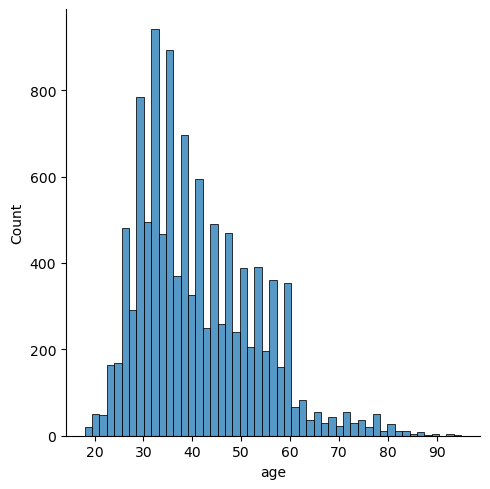

In [20]:
# remove outliers in age, balance, previous columns
# check outliers of age
sns.displot(df, x="age")

In [21]:
# let's remove everything that is considered as outliers
df = df.query("age > age.quantile(0.05) and age < age.quantile(0.75)")

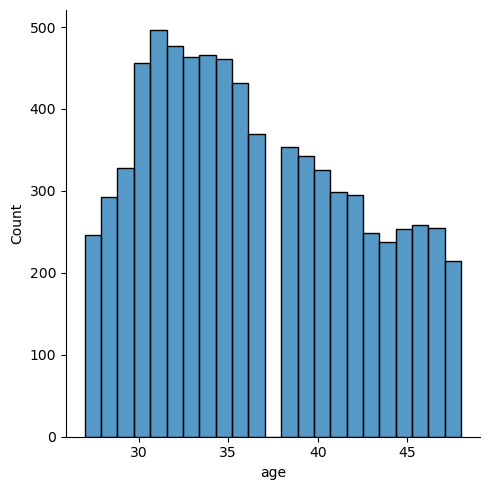

In [22]:
# data is not perfecrly balanced but it is better
# than it was before
sns.displot(df, x="age")

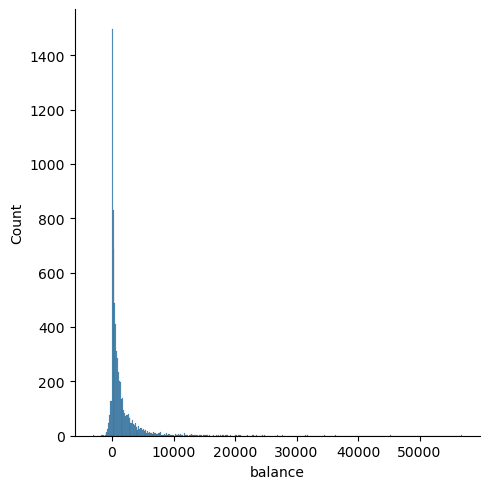

In [23]:
# let's check the balance column
sns.displot(df, x="balance")

In [24]:
# let's remove everything that is considered as outliers
df = df.query("balance > balance.quantile(0.001) and balance < balance.quantile(0.85)")

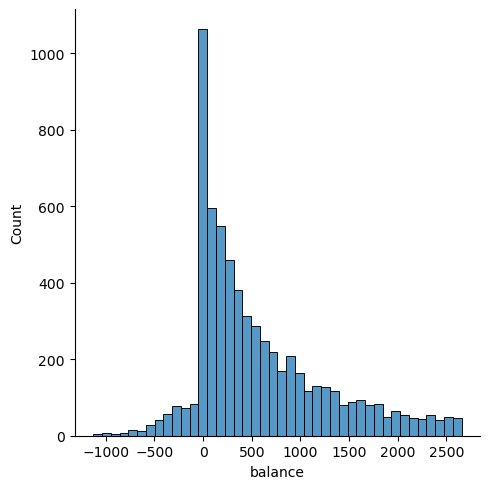

In [25]:
# data is not perfecrly balanced but it is better
# than it was before
sns.displot(df, x="balance")

In [26]:
# let's check the previous column
class_counts = df['previous'].value_counts()
class_counts

0     4849
1      496
2      385
3      238
4      137
5       97
6       69
7       37
8       32
10      17
9       15
11      12
12       8
17       8
13       5
15       4
19       3
14       3
16       2
58       1
22       1
55       1
23       1
30       1
27       1
41       1
18       1
37       1
20       1
Name: previous, dtype: int64

In [27]:
# let's remove outliers
# just a reminder, what "previous" means
# previous --> number of contacts performed before this campaign and for this client (numeric)
df = df.query("previous < previous.quantile(0.96)")

In [28]:
# now we deleted all clients who had
# a numerous amount of calls from the company
# it is an outlier because it can be viewed as
# an exception
class_counts = df['previous'].value_counts()
class_counts

0    4849
1     496
2     385
3     238
4     137
Name: previous, dtype: int64

In [29]:
# Outliers detected using IQR method
# NaN --> no outliers
# Number --> outlier, that is needed to be checked and removed

# to make a fixed heigh and enable vertical scrolling
# otherwise, there was a bug and the whole table was displayed
from IPython.display import display, HTML

# Function to detect outliers using IQR method
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        col_outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)][col]
        outliers = pd.concat([outliers, col_outliers], axis=1)
    return outliers

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(df)

# Display scrollable table
html_outliers_iqr = outliers_iqr.to_html()
display(HTML(f'<div style="height:200px; overflow-y:auto;">{html_outliers_iqr}</div>'))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
30,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# remove outliers in poutcome

In [31]:
# let's check outliers in the "poutcome" column
# # poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"
# poutcome --> failure: 0, other: 1, success: 2, unknown: 3
class_counts = df['poutcome'].value_counts()
class_counts

3    4849
0     611
2     408
1     237
Name: poutcome, dtype: int64

In [32]:
# remove outliers
df = df.query('poutcome >= poutcome.quantile(q=0.2)')

In [33]:
# now we have lees of 
lass_counts = df['poutcome'].value_counts()
class_counts

3    4849
0     611
2     408
1     237
Name: poutcome, dtype: int64

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
10,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
11,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1


In [35]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000
mean,36.413924,4.396994,1.245387,1.295796,0.021305,549.281149,0.537189,0.149515,0.602435,15.940460,6.103862,373.704584,2.705916,12.243485,0.162070,2.922389,0.401940
std,5.869317,3.361878,0.627783,0.696676,0.144413,676.417829,0.498663,0.356629,0.894245,8.463755,2.336564,362.562261,3.013079,54.891297,0.631178,0.267584,0.490337
min,27.000000,0.000000,0.000000,0.000000,0.000000,-1129.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,51.000000,0.000000,0.000000,0.000000,8.000000,5.000000,133.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,36.000000,4.000000,1.000000,1.000000,0.000000,322.000000,1.000000,0.000000,0.000000,16.000000,6.000000,248.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,41.000000,7.000000,2.000000,2.000000,0.000000,882.000000,1.000000,0.000000,2.000000,22.000000,8.000000,508.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,48.000000,11.000000,2.000000,3.000000,1.000000,2655.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3284.000000,43.000000,771.000000,4.000000,3.000000,1.000000


# Converting data to X/y and checking multicollinearity by using VIF

In [36]:
# converting data to X/y
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('deposit', axis=1)
y = df['deposit']

In [37]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
vif_data

# "default," "balance," "loan," "contact," "campaign"
# --> are not highly correlated with each other

#  "age," "marital," "education," "day," "month," "duration," "pdays," "previous"
# --> higher levels of multicollinearity. 
# A VIF value above 10 is often considered problematic and may require further investigation.

# Notably, the "poutcome" feature has a very high VIF of 91.836809, 
# indicating a strong multicollinearity issue with other predictors in the model

,feature,VIF
0,age,43.896544
1,job,2.868764
2,marital,5.751743
3,education,4.847461
4,default,1.053603
5,balance,1.740351
6,housing,2.492424
7,loan,1.221697
8,contact,1.681238
9,day,4.702551


# Scaling the values

In [38]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [39]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Creating the logistic regression and fitting the data

In [40]:
# Variant 1:
# logmodel = LogisticRegression()
# logmodel.fit(X_train, y_train)
# Model overall accuracy: 79.62%

# Variant 2:
#logmodel = make_pipeline(StandardScaler(),
                     #    PolynomialFeatures(degree=2, include_bias=False), 
                     #    LogisticRegression(solver="sag"))

#logmodel.fit(X_train, y_train)
# Model overall accuracy: 83.12%

# Variant 3:
#logmodel = make_pipeline(LogisticRegression(solver="newton-cholesky"))
#logmodel.fit(X_train, y_train)
# Model overall accuracy: 81.67%

# Variant 3:
# logmodel = make_pipeline(StandardScaler(), LogisticRegression(solver="newton-cholesky"))
# logmodel.fit(X_train, y_train)
# Model overall accuracy: 81.06%

# Variant 4:
logmodel = make_pipeline(StandardScaler(), 
                        PolynomialFeatures(degree=2, include_bias=False), 
                        LogisticRegression(solver="newton-cholesky"))
logmodel.fit(X_train, y_train)
# Model overall accuracy: 83.35%

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('logisticregression',
                 LogisticRegression(solver='newton-cholesky'))])

#  Classification error metrics

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# f1-score is 0.77 for the 1 class due to
# a slightly lower balance between precision 
# and recall for class 1 compared to class 0.

# accuracy is 0.82
# I think it could be higher if we had more balanced data

# after several trainings the overal accuraccy decreased
# in the first training period it was 83.35%

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       768
           1       0.79      0.75      0.77       547

    accuracy                           0.81      1315
   macro avg       0.81      0.81      0.81      1315
weighted avg       0.81      0.81      0.81      1315


Model overall accuracy: 81.44%


In [43]:
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)
print(confusion_matrix(y_test, predictions))

# It's crucial to assess the balance between 
# false positives and false negatives
# In my case, FP is almost doubled compared to FN

# I think, it is becuase unbalanced between positive 
# and negative outcome in the "deposit" column in the dataframe

[[661 107]
 [137 410]]


In [44]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

# 0.51 is not bad as it could be :)

0.48640549416010664

# Testing the model with new data

In [45]:
# I made a table with all enconded values
# in order to make a proccess of filling 
# the tester row easier

# Adjust display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Define the data as a dictionary
data = {
    'Feature': ['Job', 'Marital Status', 'Education Level', 'contact - Contact Method', 'Outcome of Previous Marketing Campaign', 'Month of Last Contact', 'default - Has Credit Default', 'housing - Has Housing Loan', 'loan - Has Personal Loan', 'deposit - Has the client subscribed a term deposit?'],
    'Description': ['Type of occupation: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown', 
                    'Marital status of the client: divorced, married, single', 
                    'Highest level of education: primary, secondary, tertiary, unknown', 
                    'Method of communication: cellular, telephone, unknown', 
                    'Outcome of previous marketing campaign: failure, other, success, unknown', 
                    'Month of last contact: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec', 
                    'Has credit in default: yes, no', 
                    'Has housing loan: yes, no', 
                    'Has personal loan: yes, no', 
                    'Subscribed to term deposit: yes, no'],
    'Encoded Values': ['0 - admin., 1 - blue-collar, 2 - entrepreneur, 3 - housemaid, 4 - management, 5 - retired, 6 - self-employed, 7 - services, 8 - student, 9 - technician, 10 - unemployed, 11 - unknown', 
                       '0 - divorced, 1 - married, 2 - single', 
                       '0 - primary, 1 - secondary, 2 - tertiary, 3 - unknown', 
                       '0 - cellular, 1 - telephone, 2 - unknown', 
                       '0 - failure, 1 - other, 2 - success, 3 - unknown', 
                       '1 - jan, 2 - feb, 3 - mar, 4 - apr, 5 - may, 6 - jun, 7 - jul, 8 - aug, 9 - sep, 10 - oct, 11 - nov, 12 - dec', 
                       '0 - yes, 1 - no', 
                       '0 - yes, 1 - no', 
                       '0 - yes, 1 - no', 
                       '0 - yes, 1 - no']
}

# Create a DataFrame
table_with_encoded_values = pd.DataFrame(data)

# Display the DataFrame without index
display(table_with_encoded_values.style.hide_index())


/var/folders/lj/tcwl5glj0blfftjn4df0129r0000gn/T/ipykernel_21227/2539959144.py:39: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table_with_encoded_values.style.hide_index())


Feature,Description,Encoded Values
Job,"Type of occupation: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown","0 - admin., 1 - blue-collar, 2 - entrepreneur, 3 - housemaid, 4 - management, 5 - retired, 6 - self-employed, 7 - services, 8 - student, 9 - technician, 10 - unemployed, 11 - unknown"
Marital Status,"Marital status of the client: divorced, married, single","0 - divorced, 1 - married, 2 - single"
Education Level,"Highest level of education: primary, secondary, tertiary, unknown","0 - primary, 1 - secondary, 2 - tertiary, 3 - unknown"
contact - Contact Method,"Method of communication: cellular, telephone, unknown","0 - cellular, 1 - telephone, 2 - unknown"
Outcome of Previous Marketing Campaign,"Outcome of previous marketing campaign: failure, other, success, unknown","0 - failure, 1 - other, 2 - success, 3 - unknown"
Month of Last Contact,"Month of last contact: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec","1 - jan, 2 - feb, 3 - mar, 4 - apr, 5 - may, 6 - jun, 7 - jul, 8 - aug, 9 - sep, 10 - oct, 11 - nov, 12 - dec"
default - Has Credit Default,"Has credit in default: yes, no","0 - yes, 1 - no"
housing - Has Housing Loan,"Has housing loan: yes, no","0 - yes, 1 - no"
loan - Has Personal Loan,"Has personal loan: yes, no","0 - yes, 1 - no"
deposit - Has the client subscribed a term deposit?,"Subscribed to term deposit: yes, no","0 - yes, 1 - no"


In [46]:
# display df to see values
# it makes the process of filling the tester row easier
df.head()

# campaign - number of contacts performed during this campaign and for this client
# pdays - number of days that passed by after the client was last contacted 
# from a previous campaign (numeric; -1 means client was not previously contacted)	

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
10,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
11,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1


In [47]:
# display all columns in order to copy paste them
# into the a tester row
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [48]:
# just for a reminder what these columns mean:

# default --> has credit in default? (binary: "yes","no")
# duration --> last contact duration, in seconds (numeric)
# campaign --> number of contacts performed during this campaign 
# and for this client (numeric, includes last contact)
# pdays --> number of days that passed by after the client was last contacted 
# from a previous campaign (numeric, -1 means client was not previously contacted)
# previous --> number of contacts performed before this campaign and for this client (numeric)
# poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

# Gender -> 0 => Female, 1 => Male
tester_row = {
    'age': 25, 
    'job': 2, 
    'marital': 1, 
    'education': 2, 
    'default': 1, 
    'balance': 5000, 
    'housing': 0,
    'loan': 0, 
    'contact': 1, 
    'day': 5, 
    'month': 2, 
    'duration': 120, 
    'campaign': 1, 
    'pdays': -1,
    'previous': 0, 
    'poutcome': 3, 
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this customer take a deposit (Yes/No):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.37190063 0.62809937]]

Did this customer take a deposit (Yes/No):
Yes
-------------------


In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
10,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
11,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1


In [50]:
# I need to rename all columns because it is really to orientate
# in these all names
df = df.rename(columns={'default': 'failed_previous_credit', 
                        'housing': 'housing_loan',
                        'contact': 'contact_type',
                        'duration': 'contact_duration_sec',
                        'campaign': 'number_of_contacts',
                        'pdays': 'days_since_last_contact',
                        'previous': 'previous_number_of_contacts',
                        'deposit': 'subscribed_deposit',
                        'day': 'day_of_week'})

In [51]:
# now it is easier to understand meaning of columns
df.head()

,age,job,marital,education,failed_previous_credit,balance,housing_loan,loan,contact_type,day_of_week,month,contact_duration_sec,number_of_contacts,days_since_last_contact,previous_number_of_contacts,poutcome,subscribed_deposit
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
10,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
11,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1


# Saving a trained scikit-learn model into a file

In [52]:
from joblib import dump, load
dump(logmodel, 'logmodel.joblib') 

['logmodel.joblib']

# Analysis

**How does the code work, and where could logistics regression be useful in working life?**  
This logistics regression would be very useful in marketing purpose. When I worked as a marketing manager (2020-2023), it could have been very profitable to use this model in order to specify the target audience. 

During my tenure as a marketing specialist (2020-2023), it could have proved highly profitable to utilize this model for specifying the target audience.

**Was it easy or difficult to use?**  
It was very easy for me. However, the development of the app might pose more challenges.

**Anything else that come into mind? Any ideas for optimizations?**  
I tried various optimizations (scaling, standardization, regularization, log transform) to improve the performance of my logistic regression model. While it didn't double my metrics, it did lead to a slight enhancement, which was good.

I changed name of columns to better understand the meaning of them.

Despite having sufficient data (around 11,000 rows initially and 5,257 rows at the end), I still encountered some difficulties achieving satisfactory metrics. I suppose the issue may have been dropping too much data in pursuit of finding the "perfect" balance.

Moreover, I think that if I had gathered marketing information about clients, I would have emphasized some other major aspects, such as whether the client was familiar with the company beforehand, if the client had any recommendations from a friend, etc.